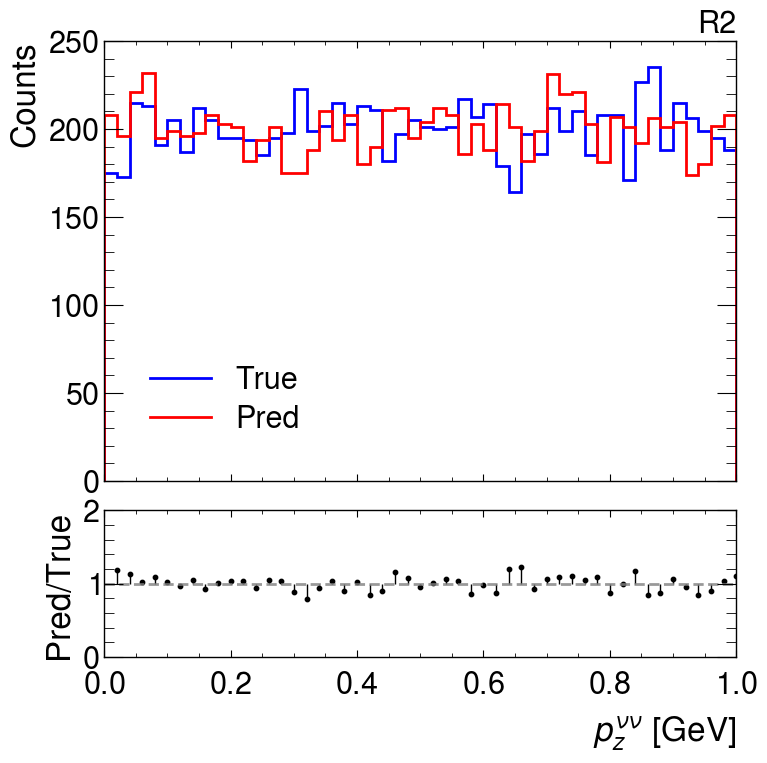

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

hep.style.use("ATLAS")

def hist(true, pred, ranges=[0.0, 1.0], xlabel=r"$p_{z}^{\nu\nu}$ [GeV]", title="R2", ylabel="Counts", sub_ylabel="Pred/True", bins=50, weights=None, save_name=None, dpi=300):
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), gridspec_kw={"height_ratios": [6, 2], "hspace": 0.1}, sharex=True)
    
    truth_bar, truth_bin = np.histogram(true, bins=bins, range=ranges, weights=weights)
    pred_bar, _ = np.histogram(pred, bins=bins, range=ranges, weights=weights)
    
    hep.histplot(truth_bar, truth_bin, label="True", ax=ax1, lw=2, color="b")
    hep.histplot(pred_bar, truth_bin, label="Pred", ax=ax1, lw=2, color="r")
    
    label_size = 24
    tick_size = 22
    title_size = 22
    
    ax1.set_xlim(ranges)
    ax1.legend(fontsize=tick_size)
    ax1.set_ylabel(ylabel, fontsize=label_size, labelpad=5)
    ax1.set_title(title, fontsize=title_size, loc='right')
    
    ratio = np.divide(pred_bar + 1, truth_bar + 1, where=(truth_bar != 0))
    ax2.vlines(truth_bin[1:], 1, ratio, color="k", lw=1)
    
    for i, val in enumerate(ratio):
        if val >= 2:
            ax2.annotate('', xy=(truth_bin[i+1], 2), xytext=(truth_bin[i+1], 1.9),
                            arrowprops=dict(facecolor='k', shrink=0.02, width=1, headwidth=3))
        elif val <= 0:
            ax2.annotate('', xy=(truth_bin[i+1], 0), xytext=(truth_bin[i+1], 0.1),
                            arrowprops=dict(facecolor='k', shrink=0.02, width=1, headwidth=3))
        else:
            ax2.scatter(truth_bin[i+1], val, color="k", lw=1, s=10)
    
    ax2.set_ylim([0, 2])
    ax2.axhline(1, c="grey", ls="dashed", alpha=.8)
    
    xlabel = xlabel
    ax2.set_xlabel(xlabel, fontsize=label_size, labelpad=10)
    ax2.set_ylabel(sub_ylabel, fontsize=label_size, labelpad=5)
    
    ax1.tick_params(axis="y", labelsize=tick_size)
    ax2.tick_params(axis="x", pad=10, labelsize=tick_size)
    ax2.tick_params(axis="y", labelsize=tick_size)
    
    if save_name is not None:
        plt.savefig(f"{save_name}.png", dpi=dpi)
    
    plt.show()
    plt.close()

# Example usage
x_data = np.random.rand(100_00)
y_data = np.random.rand(100_00)
hist(x_data, y_data, save=True)

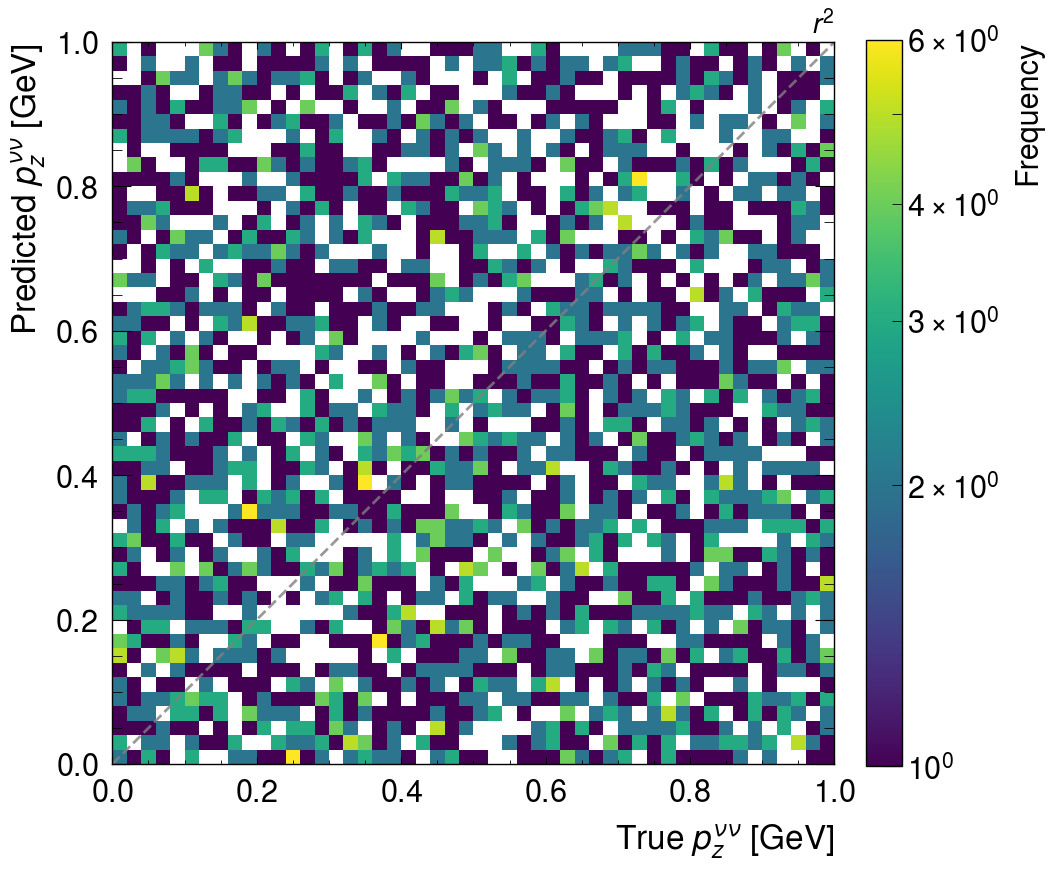

In [33]:
from matplotlib.colors import LogNorm
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep

hep.style.use("ATLAS")

def plot_2d_histogram(
    true, pred, ranges=[0.0, 1.0], xlabel=r"True $p_{z}^{\nu\nu}$ [GeV]", ylabel=r"Predicted $p_{z}^{\nu\nu}$ [GeV]", title=r"$r^2$", bins=50, weights=None, save_name="fig", dpi=300
):
    if ranges is None:
        ranges = [
            np.min([np.min(pred), np.min(true)]),
            np.max([np.max(pred), np.max(true)]),
        ]
    
    label_size = 24
    tick_size = 22
    title_size = 20
    
    fig, ax = plt.subplots(figsize=(10, 10))  # Make the figure square
    h = ax.hist2d(
        pred,
        true,
        bins=bins,
        range=[ranges, ranges],
        cmap="viridis",
        cmin=1,
        norm=LogNorm(),
        weights=weights,
    )
    cbar = fig.colorbar(h[3], ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Frequency", fontsize=tick_size)
    cbar.ax.tick_params(axis="both", which="both", labelsize=tick_size)
    ax.set_title(title, fontsize=title_size, loc='right')
    ax.set_xlabel(xlabel, fontsize=label_size, labelpad=10)
    ax.set_ylabel(ylabel, fontsize=label_size, labelpad=5)
    ax.plot(ranges, ranges, color="grey", linestyle="--", alpha=0.8)  # add y=x line
    ax.set_aspect("equal", adjustable="box")
    ax.tick_params(axis="both", labelsize=tick_size, pad=10)
    ax.set_xlim(ranges)
    ax.set_ylim(ranges)
    
    if save_name is not None:
        plt.savefig(f"{save_name}.png", dpi=dpi)
        
    plt.show()
    plt.close()

# Example usage
pred = np.random.normal(0, 1, 10000)
truth = np.random.rand(10000)
plot_2d_histogram(pred, truth)